<a href="https://colab.research.google.com/github/atharv946/Chromatin-Accessibility/blob/main/Step3a_shallow_model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

df_train = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_KMER_train_random_1k.csv')
df_val = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_KMER_val_random_1k.csv')

In [ ]:
df_train.head(50)

,0,1,2,3,4,5,6,7,8,9,...,4223,4224,4225,4226,4227,4228,4229,4230,4231,accessibility
0,2,0,1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
3,0,2,0,0,2,0,2,0,1,1,...,0,1,0,0,0,2,1,0,0,1.0
4,8,1,1,0,1,2,0,0,0,3,...,1,0,0,1,0,1,1,0,1,1.0
5,20,1,2,0,0,1,0,0,1,1,...,0,0,0,2,1,0,0,2,0,1.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
7,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1.0
8,1,1,1,0,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1.0
9,0,0,0,0,0,1,0,0,0,0,...,2,0,0,0,1,2,2,1,4,1.0


In [ ]:
X_train = df_train.iloc[:, :4000]
y_train = df_train['accessibility']

In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,2,0,1,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,2,0,0,2,0,2,0,1,1,...,0,0,0,2,1,0,0,0,0,0
4,8,1,1,0,1,2,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.head()

,accessibility
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [ ]:
X_val = df_val.iloc[:, :4000]
y_val = df_val['accessibility']

In [ ]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,17,2,3,0,3,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,2,0,1,0,0,0,0,2,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
y_val.head()

,accessibility
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_evaluations(y_true, y_pred):

  import matplotlib.pyplot as plt

  import seaborn as sns



  acc_score = accuracy_score(y_true, y_pred)

  print("Accuracy score: {}\n".format(acc_score))



  print("Classification Report: {}".format(classification_report(y_true, y_pred)))

  plt.figure(figsize = (10,10))



  sns.heatmap(confusion_matrix(y_true, y_pred),  annot = True, fmt="g", cmap = "Blues")

  plt.title("Consfuion Matrix")

  plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

K = [i for i in range(2,14)]

accuracies = []

for k_value in K:

  main_model = KNeighborsClassifier(n_neighbors=k_value, n_jobs = -1)

  main_model.fit(X_train,y_train)

  y_pred = main_model.predict(X_val)

  accuracies.append(accuracy_score(y_val, y_pred))

  print("Neighbour {} experiment done".format(k_value))

Neighbour 2 experiment done
Neighbour 3 experiment done
Neighbour 4 experiment done
Neighbour 5 experiment done
Neighbour 6 experiment done
Neighbour 7 experiment done
Neighbour 8 experiment done
Neighbour 9 experiment done
Neighbour 10 experiment done
Neighbour 11 experiment done
Neighbour 12 experiment done
Neighbour 13 experiment done


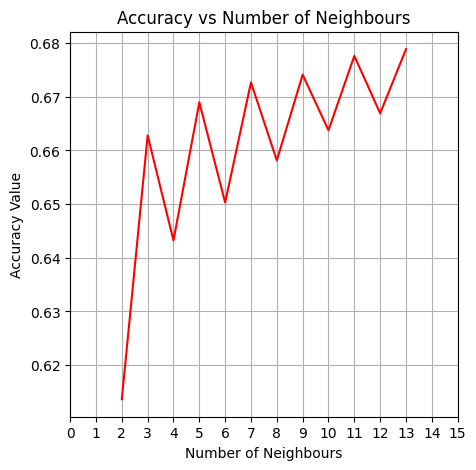

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize = (5,5))

plt.plot(K, accuracies, color = "red")

plt.xlabel("Number of Neighbours")

plt.ylabel("Accuracy Value")

plt.title("Accuracy vs Number of Neighbours")

plt.xticks([i for i in range(16)])

plt.grid(True)

plt.show()

Accuracy score: 0.6719297041257637

Classification Report:               precision    recall  f1-score   support

         0.0       0.64      0.75      0.69      7078
         1.0       0.72      0.60      0.65      7489

    accuracy                           0.67     14567
   macro avg       0.68      0.67      0.67     14567
weighted avg       0.68      0.67      0.67     14567



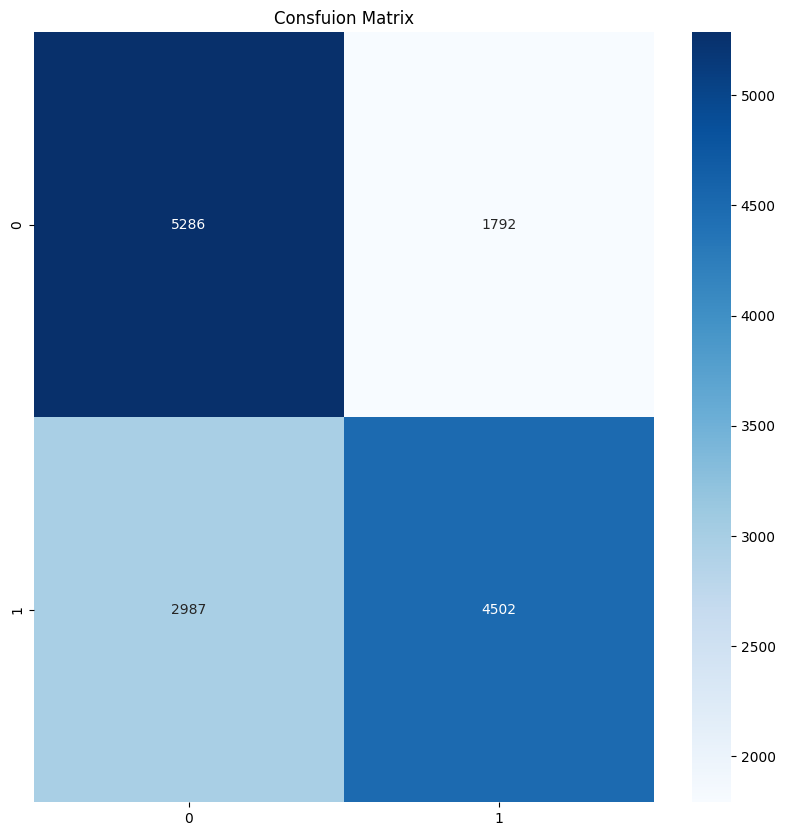

In [ ]:
#best model

best_model_one = KNeighborsClassifier(n_neighbors=14, n_jobs = -1)

best_model_one.fit(X_train, y_train)

best_ypred = best_model_one.predict(X_val)

model_evaluations(y_val, best_ypred)

In [ ]:
print(accuracies)


[0.6136472849591542, 0.6627994782728084, 0.6432347085879042, 0.6689778265943571, 0.6503054850003432, 0.6726848355872863, 0.6581313928743049, 0.6741264501956477, 0.6637605546783827, 0.6776275142445253, 0.6669183771538408, 0.678863183908835]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_depth = [1,2,3,4,5,6,7]

n_trees = [i for i in range(10,110,20)]

all_acc = []

for depth in max_depth:

  acc = []

  for tree in n_trees:

    model1 = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs = -1)

    model1.fit(X_train,y_train)

    y_pred = model1.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    acc.append(accuracy)

    print("Depth: {} and Tree: {} done".format(depth, tree))

  all_acc.append(acc)

Depth: 1 and Tree: 10 done
Depth: 1 and Tree: 30 done
Depth: 1 and Tree: 50 done
Depth: 1 and Tree: 70 done
Depth: 1 and Tree: 90 done
Depth: 2 and Tree: 10 done
Depth: 2 and Tree: 30 done
Depth: 2 and Tree: 50 done
Depth: 2 and Tree: 70 done
Depth: 2 and Tree: 90 done
Depth: 3 and Tree: 10 done
Depth: 3 and Tree: 30 done
Depth: 3 and Tree: 50 done
Depth: 3 and Tree: 70 done
Depth: 3 and Tree: 90 done
Depth: 4 and Tree: 10 done
Depth: 4 and Tree: 30 done
Depth: 4 and Tree: 50 done
Depth: 4 and Tree: 70 done
Depth: 4 and Tree: 90 done
Depth: 5 and Tree: 10 done
Depth: 5 and Tree: 30 done
Depth: 5 and Tree: 50 done
Depth: 5 and Tree: 70 done
Depth: 5 and Tree: 90 done
Depth: 6 and Tree: 10 done
Depth: 6 and Tree: 30 done
Depth: 6 and Tree: 50 done
Depth: 6 and Tree: 70 done
Depth: 6 and Tree: 90 done
Depth: 7 and Tree: 10 done
Depth: 7 and Tree: 30 done
Depth: 7 and Tree: 50 done
Depth: 7 and Tree: 70 done
Depth: 7 and Tree: 90 done


In [ ]:
print(all_acc)


[[0.5825495984073591, 0.6240131804764193, 0.6160499759730899, 0.5953181849385598, 0.6062332669732958], [0.6014965332601084, 0.6553168119722661, 0.6433720052172719, 0.6345850209377359, 0.6507860232031304], [0.6336925928468456, 0.6653394659161117, 0.6524335827555433, 0.6638292029930665, 0.6706940344614539], [0.653737900734537, 0.6691837715384087, 0.6572389647834146, 0.6784512940207318, 0.6648589277133247], [0.6538751973639048, 0.683805862566074, 0.685453422118487, 0.6874442232443193, 0.6831880277339192], [0.679961556943777, 0.6879247614471065, 0.6817464131255577, 0.6888171895379969, 0.6912885288666163], [0.6757053614333768, 0.6894350243701517, 0.6912885288666163, 0.6934852749365004, 0.6971236356147457]]


Text(0.5, 1.0, 'Accuracy values respective to max_depth and number of trees')

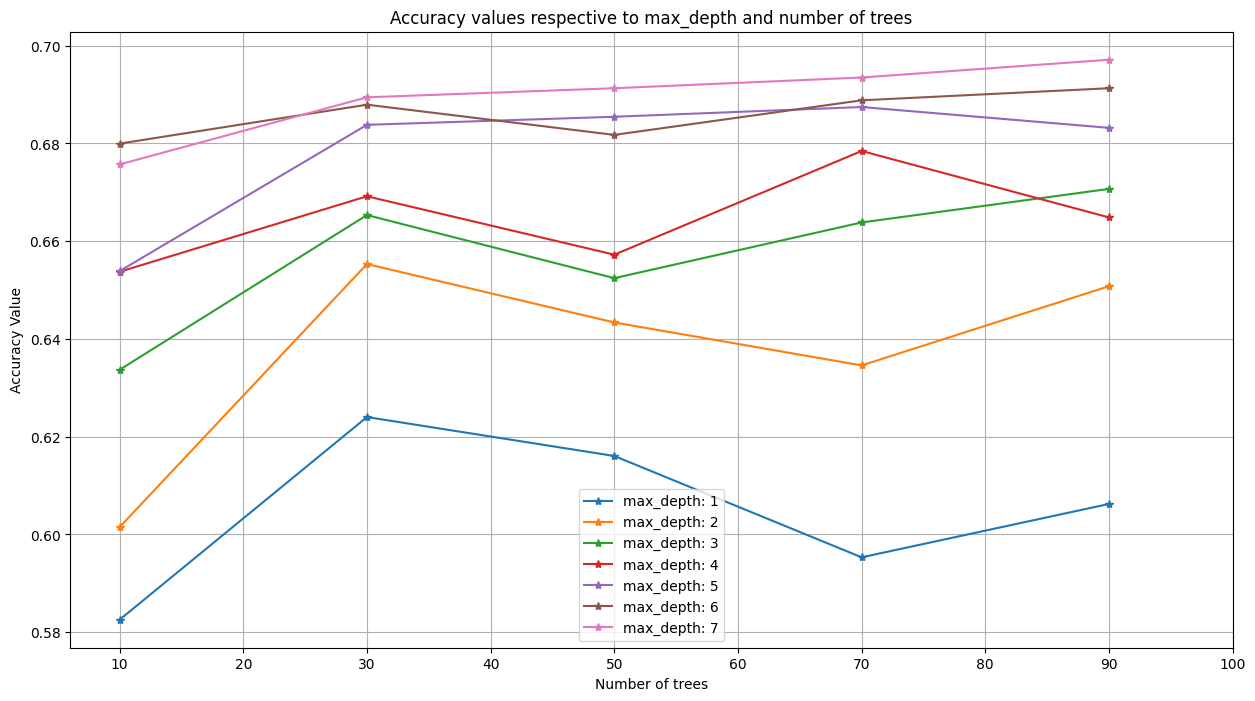

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))

for index in range(len(max_depth)):

  plt.plot(n_trees,all_acc[index],"*-", label = f"max_depth: {index + 1}")

plt.xlabel("Number of trees")

plt.ylabel("Accuracy Value")

plt.legend(loc = "best")

plt.xticks([i for i in range(10,110,10)])

plt.grid(True)

plt.title("Accuracy values respective to max_depth and number of trees")

Accuracy score: 0.6962312075238553

Classification Report:               precision    recall  f1-score   support

         0.0       0.68      0.72      0.70      7078
         1.0       0.72      0.67      0.69      7489

    accuracy                           0.70     14567
   macro avg       0.70      0.70      0.70     14567
weighted avg       0.70      0.70      0.70     14567



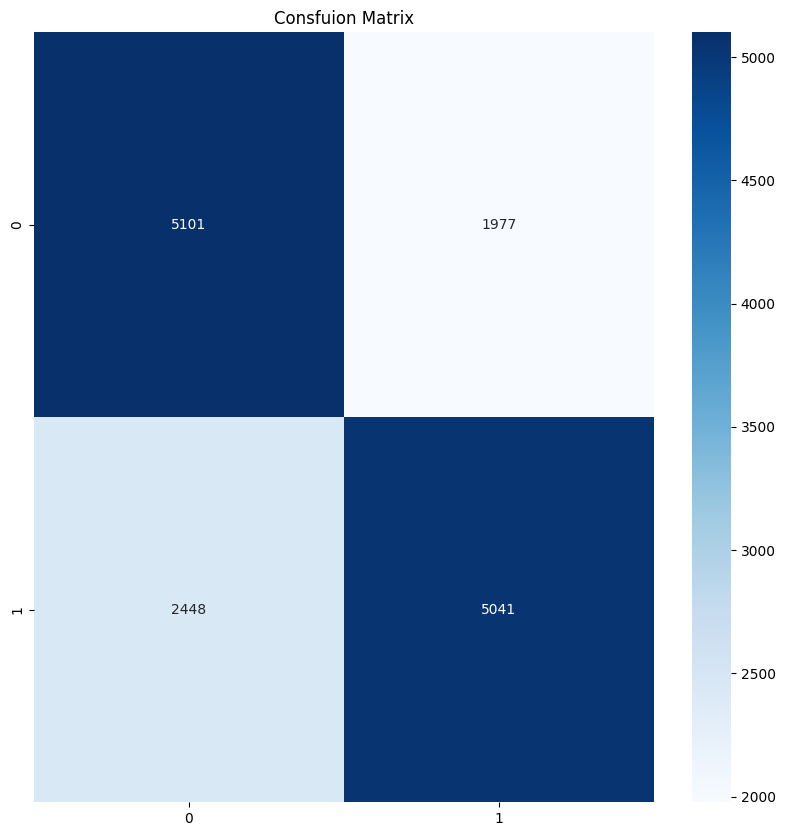

In [ ]:
# run the best model

best_model_two = RandomForestClassifier(n_estimators=50, max_depth=6)

best_model_two.fit(X_train, y_train)

best_ypred = best_model_two.predict(X_val)

model_evaluations(y_val, best_ypred)

In [ ]:
from xgboost import XGBClassifier



max_depth = [1,2,3,4,5,6,7]

n_estimators = [i for i in range(10,110,20)]



all_acc_xgb = []



for depth in max_depth:

  acc_xgb = []

  for trees in n_estimators:

    xgb_clf = XGBClassifier(max_depth=depth,n_estimators=trees,learning_rate=0.01)

    xgb_clf.fit(X_train,y_train)

    y_pred = xgb_clf.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    acc_xgb.append(accuracy)

    print("Depth: {} and  #trees: {} done".format(depth, trees))

  all_acc_xgb.append(acc_xgb)

Depth: 1 and  #trees: 10 done
Depth: 1 and  #trees: 30 done
Depth: 1 and  #trees: 50 done
Depth: 1 and  #trees: 70 done
Depth: 1 and  #trees: 90 done
Depth: 2 and  #trees: 10 done
Depth: 2 and  #trees: 30 done
Depth: 2 and  #trees: 50 done
Depth: 2 and  #trees: 70 done
Depth: 2 and  #trees: 90 done
Depth: 3 and  #trees: 10 done
Depth: 3 and  #trees: 30 done
Depth: 3 and  #trees: 50 done
Depth: 3 and  #trees: 70 done
Depth: 3 and  #trees: 90 done
Depth: 4 and  #trees: 10 done
Depth: 4 and  #trees: 30 done
Depth: 4 and  #trees: 50 done
Depth: 4 and  #trees: 70 done
Depth: 4 and  #trees: 90 done
Depth: 5 and  #trees: 10 done
Depth: 5 and  #trees: 30 done
Depth: 5 and  #trees: 50 done
Depth: 5 and  #trees: 70 done
Depth: 5 and  #trees: 90 done
Depth: 6 and  #trees: 10 done
Depth: 6 and  #trees: 30 done
Depth: 6 and  #trees: 50 done
Depth: 6 and  #trees: 70 done
Depth: 6 and  #trees: 90 done
Depth: 7 and  #trees: 10 done
Depth: 7 and  #trees: 30 done
Depth: 7 and  #trees: 50 done
Depth: 7 a

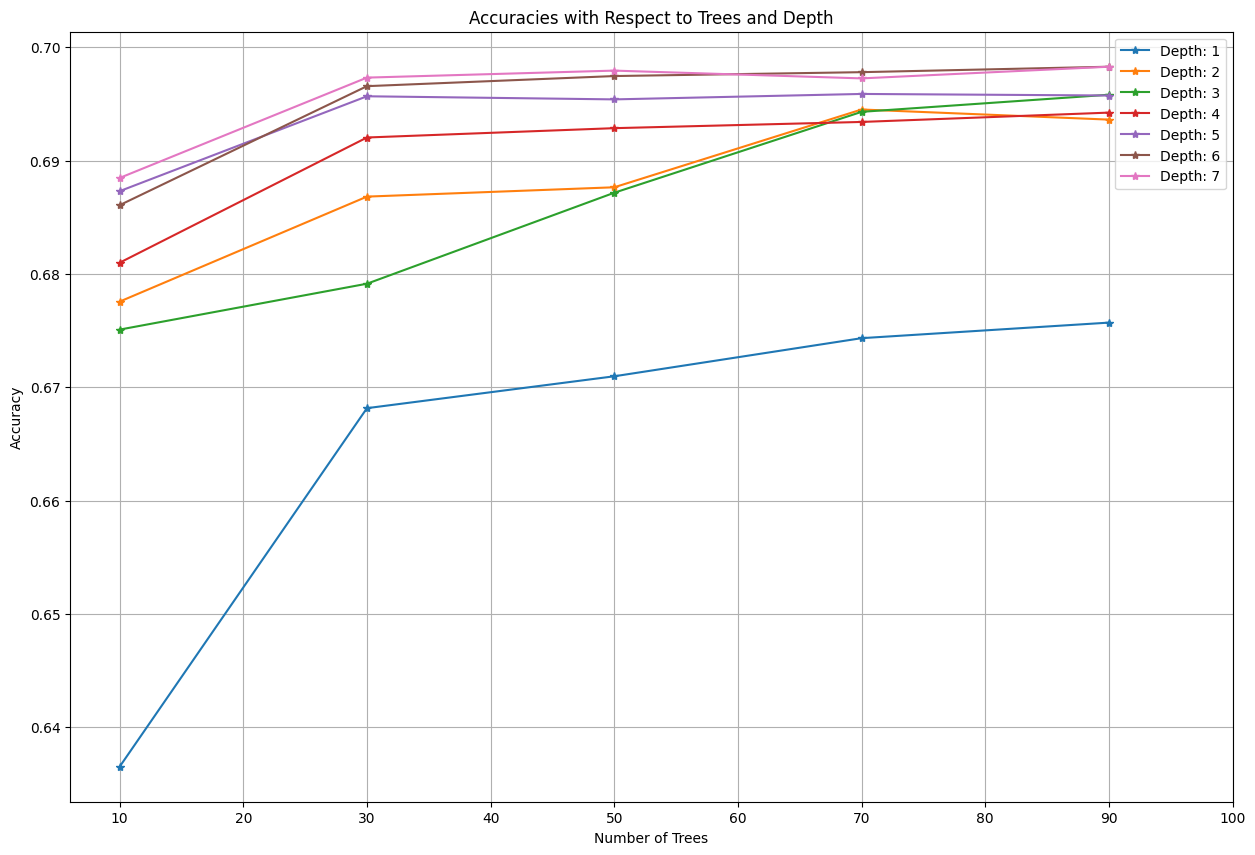

In [ ]:
import numpy as np

import matplotlib.pyplot as plt



plt.figure(figsize = (15,10))

# line 1 points

# plotting the line 1 points

for i in range(len(max_depth)):

  plt.plot(n_estimators, all_acc_xgb[i],"*-",label = "Depth: {}".format(max_depth[i]))

plt.xlabel('Number of Trees')

# Set the y axis label of the current axis.

plt.ylabel('Accuracy')

# Set a title of the current axes.

plt.title('Accuracies with Respect to Trees and Depth')

# show a legend on the plot

# This shows which line belongs to which plot

# Note that the legend displays whatever we entered as label,

# when specifying plt.plot arguments above

# Display a figure.

plt.xticks([i for i in range(10,110,10)])

plt.grid(True)



plt.legend()



plt.show()

Accuracy score: 0.6982906569643715

Classification Report:               precision    recall  f1-score   support

         0.0       0.65      0.80      0.72      7078
         1.0       0.76      0.60      0.67      7489

    accuracy                           0.70     14567
   macro avg       0.71      0.70      0.70     14567
weighted avg       0.71      0.70      0.70     14567



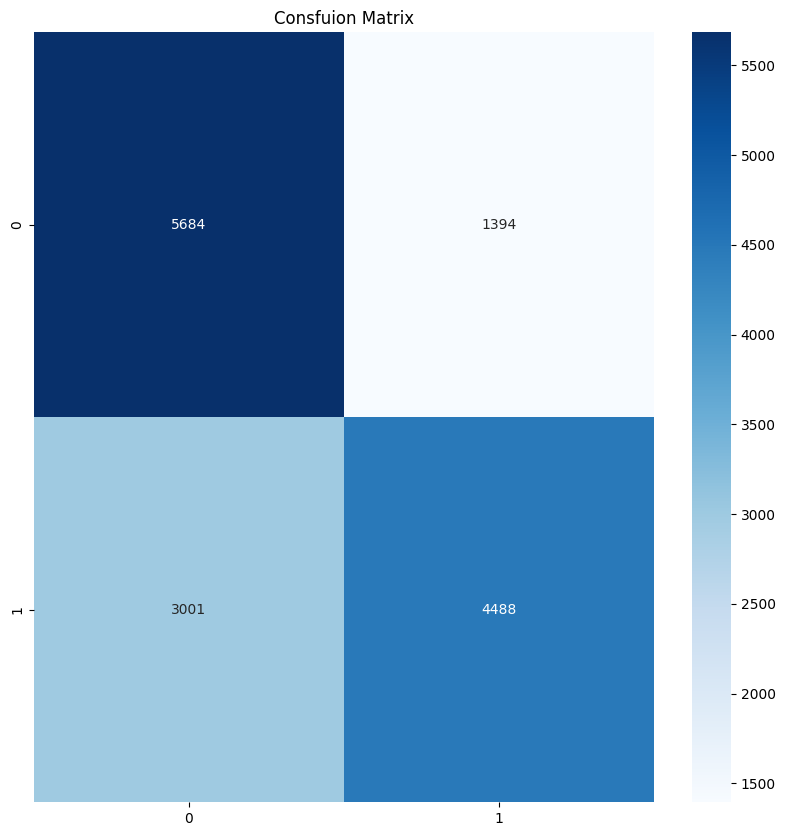

In [ ]:
#best model

best_model_xgb = XGBClassifier(max_depth=7, n_estimators=90, learning_rate=0.01)

best_model_xgb.fit(X_train, y_train)

best_ypred = best_model_xgb.predict(X_val)

model_evaluations(y_val, best_ypred)

In [ ]:
from sklearn.neural_network import MLPClassifier

learning_rate = [0.001, 0.0001]

epochs = [i for i in range(6,10,2)]

all_acc_mlp = []

for lr in learning_rate:

  acc_mlp = []

  for epo in epochs:

    model1 = MLPClassifier(learning_rate_init=lr, max_iter=epo)

    model1.fit(X_train,y_train)

    y_pred = model1.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)

    acc_mlp.append(accuracy)

    print("Learning Rate: {} and  Epoch: {} done".format(lr, epo))

  all_acc_mlp.append(acc_mlp)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001 and  Epoch: 6 done


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001 and  Epoch: 8 done


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (6) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001 and  Epoch: 6 done


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001 and  Epoch: 8 done


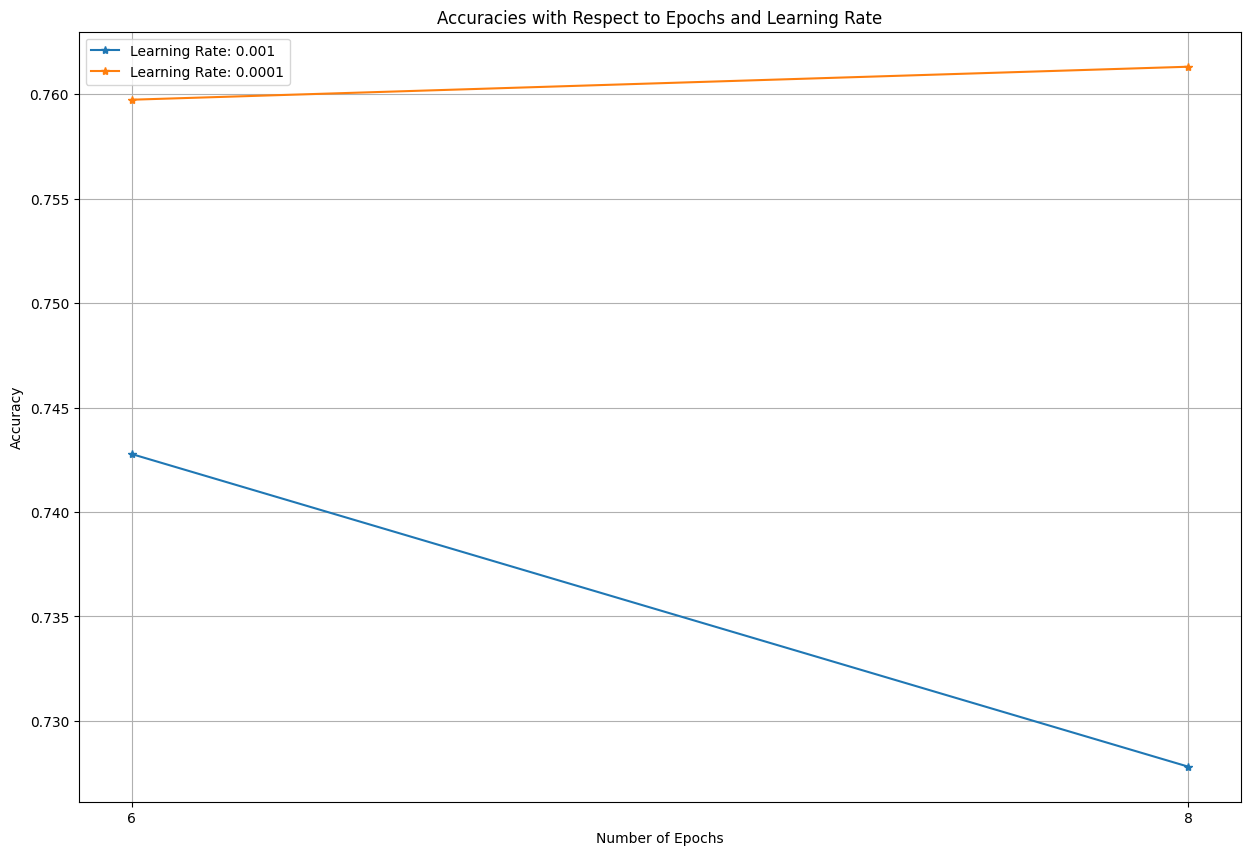

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))

# line 1 points

# plotting the line 1 points

for i in range(len(learning_rate)):

  plt.plot(epochs, all_acc_mlp[i],"*-",label = "Learning Rate: {}".format(learning_rate[i]))

plt.xlabel('Number of Epochs')

# Set the y axis label of the current axis.

plt.ylabel('Accuracy')

# Set a title of the current axes.

plt.title('Accuracies with Respect to Epochs and Learning Rate')

# show a legend on the plot

# This shows which line belongs to which plot

# Note that the legend displays whatever we entered as label,

# when specifying plt.plot arguments above

# Display a figure.

plt.xticks([i for i in range(6,10,2)])

plt.grid(True)


plt.legend()


plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score: 0.7576028008512391

Classification Report:               precision    recall  f1-score   support

         0.0       0.75      0.76      0.75      7078
         1.0       0.77      0.76      0.76      7489

    accuracy                           0.76     14567
   macro avg       0.76      0.76      0.76     14567
weighted avg       0.76      0.76      0.76     14567



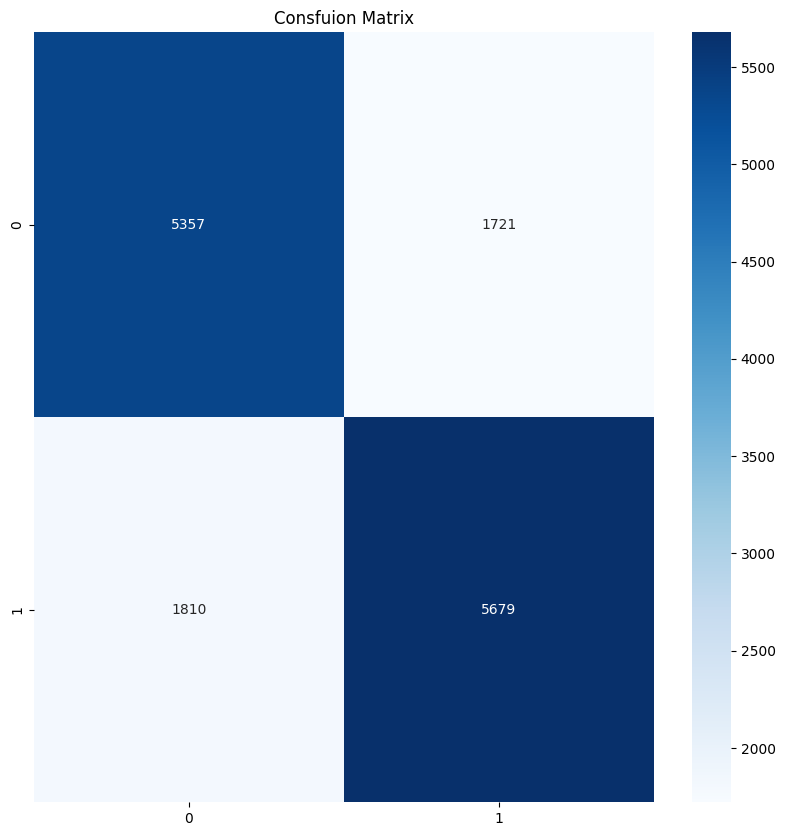

In [ ]:
#best model
best_model_mlp = MLPClassifier(learning_rate_init=0.0001, max_iter=10)

best_model_mlp.fit(X_train, y_train)

best_ypred = best_model_mlp.predict(X_val)

model_evaluations(y_val, best_ypred)

In [ ]:
import pickle

fh = open("/content/drive/MyDrive/1:1_Atharv_Gupta/Models/best_shallow_model", "wb")

final_best = best_model_mlp

pickle.dump(final_best, fh)

fh.close()

Classification Report:
              precision    recall  f1-score   support

Inaccessible       0.77      0.77      0.77      7306
  Accessible       0.76      0.76      0.76      7261

    accuracy                           0.77     14567
   macro avg       0.77      0.77      0.77     14567
weighted avg       0.77      0.77      0.77     14567

Accuracy score: 0.7650168188370976

Classification Report:               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      7306
         1.0       0.76      0.76      0.76      7261

    accuracy                           0.77     14567
   macro avg       0.77      0.77      0.77     14567
weighted avg       0.77      0.77      0.77     14567



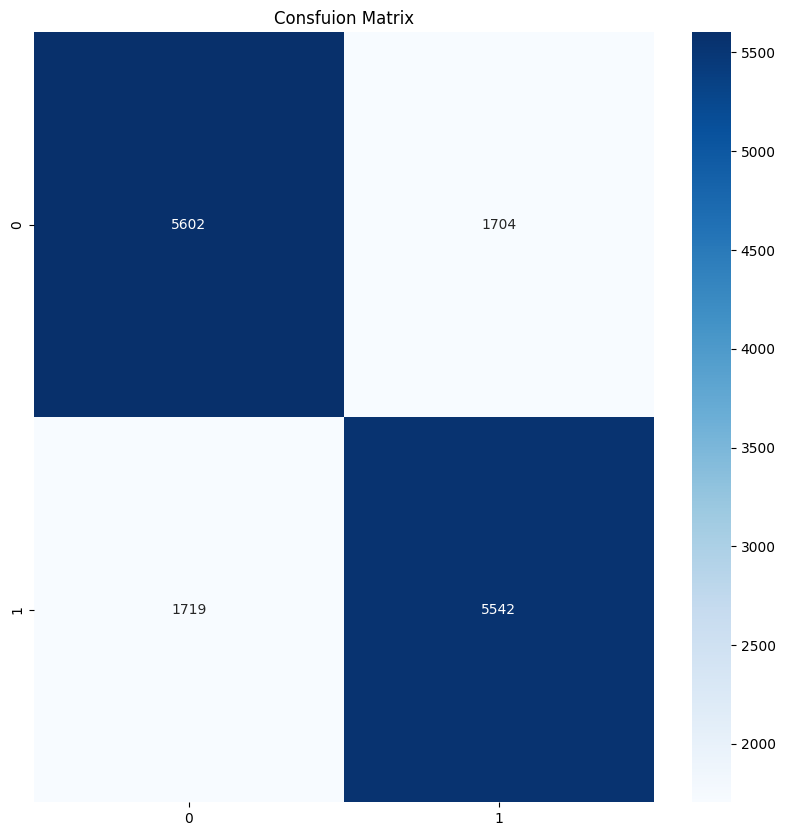

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/1:1_Atharv_Gupta/Datasets/joined_KMER_test_random_1k.csv')
X_test = df_test.iloc[:, :4000]
y_test  = np.array(df_test['accessibility'])
test_ypred_probs = best_model_mlp.predict(X_test)
test_y_pred = np.argmax(test_ypred_probs, axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:")
class_names = ['Inaccessible','Accessible']
print(classification_report(y_test, test_ypred_probs, target_names=class_names))
model_evaluations(y_test, test_ypred_probs)